In [27]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
cwd = os.getcwd()
files = os.listdir(cwd)
print(files)

['.config', 'sample_data']


In [6]:
data = pd.read_csv("dark_triad.csv")

In [7]:
data.head(10)

,Self-perceived attractiveness,Number of sexual partners,Mate value,"Sex (0 = male, 1 = female)",Machiavellianism,Narcissism,Psychopathy
0,4,3,21,0,32,32,30
1,3,4,21,0,30,23,27
2,2,12,18,0,24,19,28
3,1,10,16,0,33,21,24
4,3,1,22,0,22,24,14
5,3,3,21,0,14,29,25
6,4,4,20,0,12,27,23
7,3,10,24,0,35,36,23
8,4,0,18,0,16,21,19
9,3,0,17,0,30,16,22


In [8]:
data.shape

(210, 7)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Self-perceived attractiveness  210 non-null    int64
 1   Number of sexual partners      210 non-null    int64
 2   Mate value                     210 non-null    int64
 3   Sex (0 = male, 1 = female)     210 non-null    int64
 4   Machiavellianism               210 non-null    int64
 5   Narcissism                     210 non-null    int64
 6   Psychopathy                    210 non-null    int64
dtypes: int64(7)
memory usage: 11.6 KB


In [62]:
data.describe()

,Self-perceived attractiveness,Number of sexual partners,Mate value,"Sex (0 = male, 1 = female)",Machiavellianism,Narcissism,Psychopathy
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.00000
mean,3.352381,4.895238,19.776190,0.490476,24.147619,25.466667,19.37619
std,0.846959,5.550850,4.283316,0.501104,6.651411,5.089753,5.67850
min,1.000000,0.000000,5.000000,0.000000,9.000000,12.000000,9.00000
25%,3.000000,1.000000,17.000000,0.000000,20.000000,22.000000,15.00000
50%,3.000000,3.000000,20.000000,0.000000,23.000000,25.000000,19.00000
75%,4.000000,6.000000,23.000000,1.000000,30.000000,28.000000,23.75000
max,5.000000,35.000000,28.000000,1.000000,41.000000,43.000000,37.00000


## Preprocessing

In [13]:
def preprocess(df):
    df = df.copy()
    
    #Sex preprocess
    df.rename(columns = {"Sex (0 = male, 1 = female)": "Sex"}, inplace=True)
    
    return df

In [14]:
X = preprocess(data)

In [15]:
X.head()

,Self-perceived attractiveness,Number of sexual partners,Mate value,Sex,Machiavellianism,Narcissism,Psychopathy
0,4,3,21,0,32,32,30
1,3,4,21,0,30,23,27
2,2,12,18,0,24,19,28
3,1,10,16,0,33,21,24
4,3,1,22,0,22,24,14


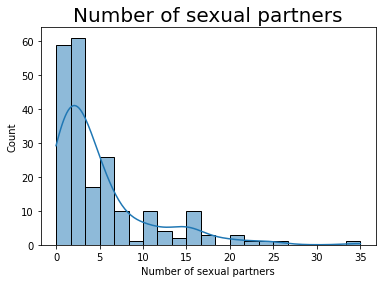

In [58]:
# Number of sexual partners distribution (target)
sns.histplot(X["Number of sexual partners"], kde=True)
plt.title("Number of sexual partners", fontsize=20)
plt.show()

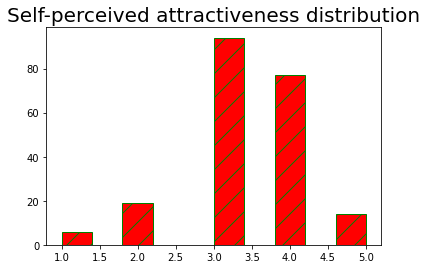

In [113]:
#Self-perceived attractiveness distribution
plt.hist(X["Self-perceived attractiveness"], histtype="step", facecolor="red", hatch="/", edgecolor="green", fill=True)
plt.title("Self-perceived attractiveness distribution", fontsize=20)
plt.show()

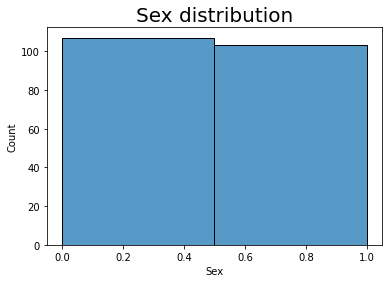

In [56]:
#Sex distribution
sns.histplot(X["Sex"], bins=2)
plt.title("Sex distribution", fontsize=20)
plt.show()

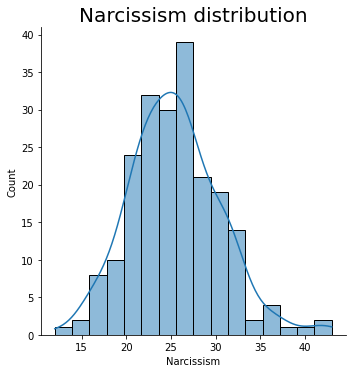

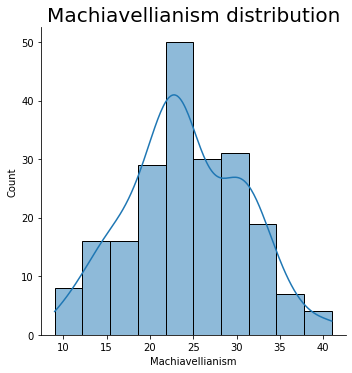

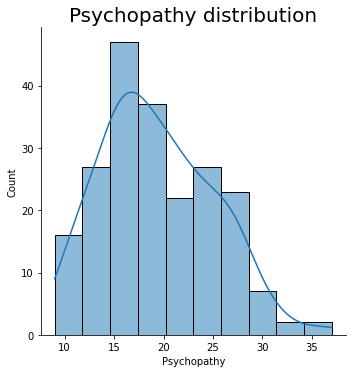

In [44]:
#Plot dark triad traits
narc = "Narcissism"
mach = "Machiavellianism"
psyc = "Psychopathy"

sns.displot(data=X, x=narc, kde=True)
plt.title("Narcissism distribution", fontsize=20)
sns.displot(data=X, x=mach, kde=True)
plt.title("Machiavellianism distribution", fontsize=20)
sns.displot(data=X, x=psyc, kde=True)
plt.title("Psychopathy distribution", fontsize=20)

plt.show()

# Correlation

In [73]:
corr = X.corr()
cm = sns.light_palette("green", as_cmap=True)
cm = sns.diverging_palette(220, 20, sep=20,as_cmap=True)
corr.style.background_gradient(cmap=cm, axis=None).set_precision(3)

,Self-perceived attractiveness,Number of sexual partners,Mate value,Sex,Machiavellianism,Narcissism,Psychopathy
Self-perceived attractiveness,1.000,0.119,0.574,0.076,-0.005,0.362,0.053
Number of sexual partners,0.119,1.000,0.172,-0.234,0.173,0.217,0.352
Mate value,0.574,0.172,1.000,0.080,0.041,0.491,-0.025
Sex,0.076,-0.234,0.080,1.000,-0.148,-0.026,-0.324
Machiavellianism,-0.005,0.173,0.041,-0.148,1.000,0.315,0.521
Narcissism,0.362,0.217,0.491,-0.026,0.315,1.000,0.254
Psychopathy,0.053,0.352,-0.025,-0.324,0.521,0.254,1.000


In [114]:
#Add correlations for each sex separately